# Übung 5: Backpropagation für Mehrschichtperzeptronen

In [149]:
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.colors import ListedColormap
import pandas as pd

np.set_printoptions(suppress=True, linewidth=np.inf)
sns.set_style("darkgrid")

%reload_ext version_information
%version_information numpy, seaborn, pandas

Software versions
Python 3.7.4 64bit [GCC 7.3.0]
IPython 7.8.0
OS Linux 4.15.0 72 generic x86_64 with debian buster sid
numpy 1.17.2
seaborn 0.9.0
pandas 0.25.1
Thu Dec 12 10:10:56 2019 CET

In [150]:
def generate_data(x_range, y_range, num):
    lx_range, ux_range = x_range
    ly_range, uy_range = y_range
    data = np.asarray([[np.random.uniform(lx_range, ux_range), np.random.uniform(ly_range, uy_range)] for i in range(num)])
    labels = []
    for i, point in enumerate(data):
        x, y = point
        if x < 0 and y < 0:
            labels.append(0)        
        elif x < 0 and y > 0:
            labels.append(1)        
        elif x > 0 and y < 0:
            labels.append(1)        
        else:
            labels.append(0)
    return data, np.asarray(labels)

## 1. Spielzeugdatensatz

### 1.1) + 1.2) Generieren und labeln der Spielzeugdaten

In [151]:
x_range = (-6.0, 6.0)
y_range = (-6.0, 6.0)
num_data = 200
train_data, train_labels = generate_data(x_range, y_range, num_data)
test_data, test_labels = generate_data(x_range, y_range, num_data)
print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)

(200, 2) (200,)
(200, 2) (200,)


### 1.3) Ploten der Spielzeugdaten(train und test)

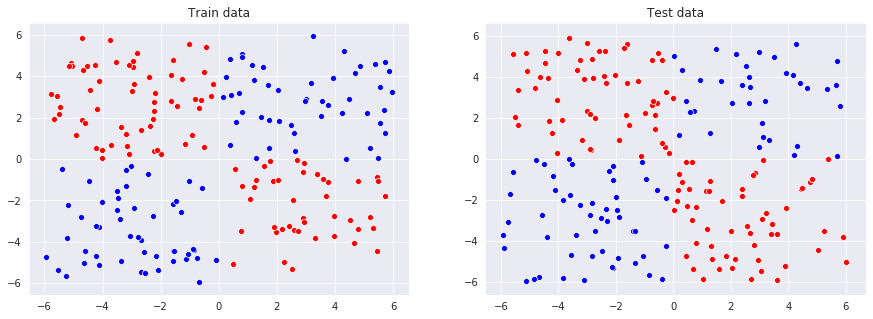

In [152]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

train_data_0 = train_data[train_labels == 0]
train_data_1 = train_data[train_labels == 1]
sns.scatterplot(x=train_data_0[:, 0], y=train_data_0[:, 1], color='blue', ax=axes[0])
sns.scatterplot(x=train_data_1[:, 0], y=train_data_1[:, 1], color='red', ax=axes[0])
axes[0].set_title("Train data")

test_data_0 = test_data[test_labels == 0]
test_data_1 = test_data[test_labels == 1]
sns.scatterplot(x=test_data_0[:, 0], y=test_data_0[:, 1], color='blue', ax=axes[1])
sns.scatterplot(x=test_data_1[:, 0], y=test_data_1[:, 1], color='red', ax=axes[1])
axes[1].set_title("Test data");

### 1.4) 

In [153]:
%%latex
Gewichte der Neuronen im Hidden Layer(Layer 2): 
\begin{align}
    w^{2}_{i1} = \begin{pmatrix} 0 \\ 1 \end{pmatrix}, b^{2}_{1} = 0  \\
    w^{2}_{i2} = \begin{pmatrix} 1 \\ 0 \end{pmatrix}, b^{2}_{2} = 0
\end{align}

<IPython.core.display.Latex object>

### 1.5) 

In [154]:
weights = np.asarray([[0, 1], [1, 0]])
biases = np.asarray([[0], [0]])
values = np.zeros(shape=(2, 100, 100))

xs = np.linspace(-6.0, 6.0, 100)
ys = np.linspace(-6.0, 6.0, 100)

for i in range(2):
    for xidx, x in enumerate(xs):
        for yidx, y in enumerate(ys):
            values[i, yidx, xidx] = sigmoid(np.dot(weights[i], np.array([x, y])) + biases[i].squeeze())
values = np.asarray(values)

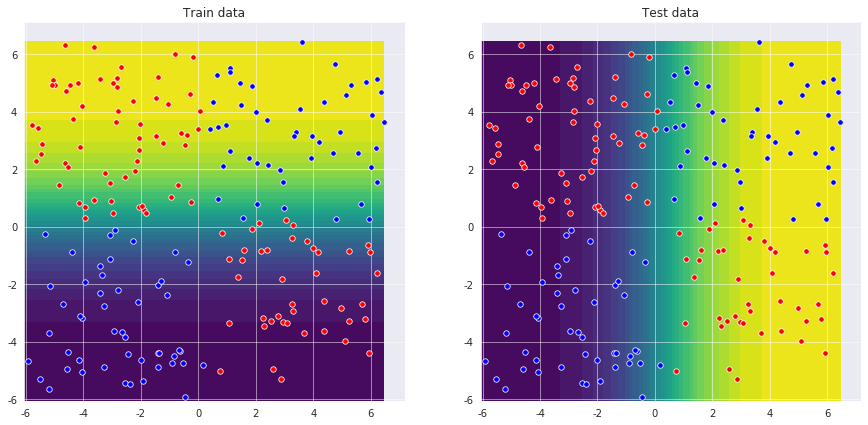

In [155]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
palette = sns.color_palette("viridis", 32)
cmap = ListedColormap(sns.color_palette(palette).as_hex())

axes[0].imshow(values[0], interpolation='none', cmap=cmap)
axes[0].grid(color='w', linestyle='-', linewidth=0.5)
axes[0].invert_yaxis()

train_data_0 = train_data[train_labels == 0]
train_data_1 = train_data[train_labels == 1]
train_data_0_plot = (train_data_0 + 6) * (100/12)
train_data_1_plot = (train_data_1 + 6) * (100/12)
sns.scatterplot(x=train_data_0_plot[:, 0], y=train_data_0_plot[:, 1], color='blue', ax=axes[0], s=30)
sns.scatterplot(x=train_data_1_plot[:, 0], y=train_data_1_plot[:, 1], color='red', ax=axes[0], s=30)
axes[0].set_title("Train data")

pos_list = np.arange(0, 100, 16)
value_list = np.arange(-6, 8, 2)
axes[0].xaxis.set_major_locator(ticker.FixedLocator((pos_list)))
axes[0].xaxis.set_major_formatter(ticker.FixedFormatter((value_list)))
axes[0].yaxis.set_major_locator(ticker.FixedLocator((pos_list)))
axes[0].yaxis.set_major_formatter(ticker.FixedFormatter((value_list)))


axes[1].imshow(values[1], interpolation='none', cmap=cmap)
axes[1].grid(color='w', linestyle='-', linewidth=0.5)
axes[1].invert_yaxis()

train_data_0 = train_data[train_labels == 0]
train_data_1 = train_data[train_labels == 1]
train_data_0_plot = (train_data_0 + 6) * (100/12)
train_data_1_plot = (train_data_1 + 6) * (100/12)
sns.scatterplot(x=train_data_0_plot[:, 0], y=train_data_0_plot[:, 1], color='blue', ax=axes[1], s=30)
sns.scatterplot(x=train_data_1_plot[:, 0], y=train_data_1_plot[:, 1], color='red', ax=axes[1], s=30)
axes[1].set_title("Test data")

pos_list = np.arange(0, 100, 16)
value_list = np.arange(-6, 8, 2)
axes[1].xaxis.set_major_locator(ticker.FixedLocator((pos_list)))
axes[1].xaxis.set_major_formatter(ticker.FixedFormatter((value_list)))
axes[1].yaxis.set_major_locator(ticker.FixedLocator((pos_list)))
axes[1].yaxis.set_major_formatter(ticker.FixedFormatter((value_list)))

In [156]:
x_coord, y_coord = -6, -6 
print("Datenpunkt ({}, {}) wird vom ersten Hidden Layer klassifiziert: ".format(x_coord, y_coord))
predictions = forward(np.array([x_coord, y_coord]), weights, biases)
print("Neuron 1: {}, Neuron 2: {}".format(predictions[0], predictions[1]))
print()
x_coord, y_coord = -6, 6 
print("Datenpunkt ({}, {}) wird vom ersten Hidden Layer klassifiziert: ".format(x_coord, y_coord))
predictions = forward(np.array([x_coord, y_coord]), weights, biases)
print("Neuron 1: {}, Neuron 2: {}".format(predictions[0], predictions[1]))
print()
x_coord, y_coord = 6, 6 
print("Datenpunkt ({}, {}) wird vom ersten Hidden Layer klassifiziert: ".format(x_coord, y_coord))
predictions = forward(np.array([x_coord, y_coord]), weights, biases)
print("Neuron 1: {}, Neuron 2: {}".format(predictions[0], predictions[1]))
print()
x_coord, y_coord = 6, -6 
print("Datenpunkt ({}, {}) wird vom ersten Hidden Layer klassifiziert: ".format(x_coord, y_coord))
predictions = forward(np.array([x_coord, y_coord]), weights, biases)
print("Neuron 1: {}, Neuron 2: {}".format(predictions[0], predictions[1]));

Datenpunkt (-6, -6) wird vom ersten Hidden Layer klassifiziert: 
Neuron 1: [array([-6, -6]) 0.0024726231566347743 array([0.50061816, 0.5       ])], Neuron 2: [-6 array([0.00247262, 0.        ])]

Datenpunkt (-6, 6) wird vom ersten Hidden Layer klassifiziert: 
Neuron 1: [array([-6,  6]) 0.9975273768433653 array([0.73057215, 0.5       ])], Neuron 2: [6 array([0.99752738, 0.        ])]

Datenpunkt (6, 6) wird vom ersten Hidden Layer klassifiziert: 
Neuron 1: [array([6, 6]) 0.9975273768433653 array([0.73057215, 0.5       ])], Neuron 2: [6 array([0.99752738, 0.        ])]

Datenpunkt (6, -6) wird vom ersten Hidden Layer klassifiziert: 
Neuron 1: [array([ 6, -6]) 0.0024726231566347743 array([0.50061816, 0.5       ])], Neuron 2: [-6 array([0.00247262, 0.        ])]


### 1.6)

In [157]:
train_activations = np.array([forward(train_data[i], weights, biases) for i in range(num_data)])
test_activations = np.array([forward(test_data[i], weights, biases) for i in range(num_data)])
print(train_activations.shape, test_activations.shape)

(200, 2) (200, 2)


## 2. Training eines MLPs auf den Spielzeugdaten

In [496]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))


def sigmoid_derived(z):
    return sigmoid(z) * (1 - sigmoid(z))


def mse_derived(output_activations, y):
    return output_activations - y
    

def forward(a, weights, biases):
    a_s = [a]
    zs = []
    for weight, bias in zip(weights, biases):
        z = np.dot(weight, a) + bias.squeeze()
        a = sigmoid(z)
        zs.append(z)
        a_s.append(a)
    return np.asarray(a_s), np.asarray(zs)


def backprob(layer_intra, layer_dims, y):
    activations, zs = layer_intra
    biases, weights = get_biases_and_weights(layer_dims)
    
    print(weights[1])
    print(weights[0])
    
    t = mse_derived(activations[-1], [y])
    s = sigmoid_derived(zs[-1])
    error_L = np.array([t * s])
    biases[-1] = error_L
    activation = np.asarray([activations[-2]])
    weights[-1] = np.dot(activation.T, error_L).T
    
    t = np.dot(error_L, weights[1])
    s = sigmoid_derived(zs[-2])
    error_l = t * s
    biases[-2] = error_l
    print(error_l.T)
    print(activations[-3])
    print(np.dot(error_l.T, activations[-3].T))
    weights[-2] = np.dot(error_l.T, activations[-3].T)
    
    return weights, biases


def get_biases_and_weights(layer_dims, fill="zeros", verbose=False):
    
    if fill == "zeros":
        biases = np.array([np.zeros(shape=(l, 1)) for l in layer_dims[1:]])
        weights = np.array([np.zeros(shape=(l1, l2)) for l1, l2 in zip(layer_dims[1:], layer_dims[:-1])])
    elif fill == "random":
        biases = np.array([np.random.rand(l, 1) for l in layer_dims[1:]])
        weights = np.array([np.random.rand(l1, l2) for l1, l2 in zip(layer_dims[1:], layer_dims[:-1])])
    else:
        print("Wrong fill type.")
    
    if verbose:
        print("bias dimensions: {}".format(layer_dims[1:]))
        print("weight dimensions: {}, {}".format(layer_dims[1:], layer_dims[:-1]))
        print()

        for i, bias in enumerate(biases):
            print("bias layer {}: \n {}".format(i+1, bias))
        print()

        for i, weight in enumerate(weights):
            print("weight layer {}: \n {}".format(i+1, weight))
        print()
    
    return biases, weights

In [497]:
lr = 0.03
n_epochs = 1
mbs = 10

layer_dims = [2, 5, 2]
biases, weights = get_biases_and_weights(layer_dims, fill="random")
    
for epoch in range(n_epochs):
    for i in range(0, num_data, mbs):
        data_points = train_data[i:i + mbs]
        label_points = train_labels[i:i + mbs]
        
        batch_biases, batch_weights = get_biases_and_weights(layer_dims)
        
        for data_point, label_point in zip(data_points, label_points):
            data_point = np.array([-6, -6])
            layer_intra = forward(data_point, weights, biases)
            single_weights, single_biases = backprob(layer_intra, layer_dims, label_point)
            break
        break
    break

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
[[0.00000002]
 [0.00004383]
 [0.00078613]
 [0.        ]
 [0.00000001]]
[-6 -6]


ValueError: shapes (5,1) and (2,) not aligned: 1 (dim 1) != 2 (dim 0)

In [394]:
a = np.zeros(shape=(5, 2))
b = np.zeros(shape=(1, 2)).T
print(a.shape, b.shape)
c = np.dot(a, b)
print(c)

(5, 2) (2, 1)
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
